# Data Preprocessing

## Importing all neccessary libraries for Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import hstack
from sklearn import preprocessing



## Loading all data sets from input folder

In [2]:
USERS = pd.read_csv('input/train_users.csv')
TEST_USERS = pd.read_csv('input/test_users.csv')
AGE_BUCKETS = pd.read_csv('input/age_gender_bkts.csv')
COUNTRIES = pd.read_csv('input/countries.csv')

TRAIN_SET = USERS
TEST_SET = TEST_USERS

`TRAIN_SET` and `TEST_SET` will be used later for building the model

## Data cleaning

### age_gender_bckts.csv cleaning and preparation

In [3]:
AGE_BUCKETS.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [4]:
AGE_BUCKETS.isnull().values.any()

False

As we can see, there is no null values in this dataset so there is no need for cleaning
What we can do is calculate average of age_bucket field so it is number and easier to work with rather than text

In [5]:
AGE_BUCKETS["age_bucket"].unique()

array(['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74',
       '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39',
       '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4'],
      dtype=object)

100+ can't be converted to number so lets use 100-104, same increment of 4 used for other groups

In [6]:
AGE_BUCKETS.loc[AGE_BUCKETS.age_bucket == '100+', 'age_bucket'] = '100-104'

In [7]:

def to_avg(age_str):
    age_str = age_str.split("-")
    age_str = [int(x) for x in age_str]
    return sum(age_str) / len(age_str)

AGE_BUCKETS["age_avg"] = AGE_BUCKETS["age_bucket"].apply(to_avg)

In [8]:
AGE_BUCKETS.head()

,age_bucket,country_destination,gender,population_in_thousands,year,age_avg
0,100-104,AU,male,1.0,2015.0,102.0
1,95-99,AU,male,9.0,2015.0,97.0
2,90-94,AU,male,47.0,2015.0,92.0
3,85-89,AU,male,118.0,2015.0,87.0
4,80-84,AU,male,199.0,2015.0,82.0


In [9]:
AGE_BUCKETS['country_destination'].value_counts()

AU    42
CA    42
DE    42
ES    42
FR    42
GB    42
IT    42
NL    42
PT    42
US    42
Name: country_destination, dtype: int64

In [10]:
AGE_BUCKETS['gender'].value_counts()

male      210
female    210
Name: gender, dtype: int64

### users.csv cleaning and preparation

In this section users.csv (short from "train users data") and test_users.csv are being cleaned and prepared for the future data modeling

In [11]:
USERS.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [12]:
TEST_USERS.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


### Merging users and test_users for the purposes of inferential stats
Note: later these files will be loaded spearately again

In [13]:
USERS = pd.concat((USERS, TEST_USERS),axis=0, ignore_index=True)
USERS.count()

id                         275547
date_account_created       275547
timestamp_first_active     275547
date_first_booking          88908
gender                     275547
age                        158681
signup_method              275547
signup_flow                275547
language                   275547
affiliate_channel          275547
affiliate_provider         275547
first_affiliate_tracked    269462
signup_app                 275547
first_device_type          275547
first_browser              275547
country_destination        213451
dtype: int64

### Printing all possible values of gender

In [14]:
print(USERS["gender"].unique())

['-unknown-' 'MALE' 'FEMALE' 'OTHER']


### Replacing gender values in following manner
- null and unknown values with -1
- OTHER with 0
- MALE with 1
- FEMALE with 2

In [15]:
USERS.loc[:, "gender"] = USERS["gender"].replace("-unknown-", -1)
USERS.loc[:, "gender"] = USERS["gender"].replace("OTHER", 0)
USERS.loc[:, "gender"] = USERS["gender"].replace("MALE", 1)
USERS.loc[:, "gender"] = USERS["gender"].replace("FEMALE", 2)

TRAIN_SET.loc[:, "gender"] = TRAIN_SET["gender"].replace("-unknown-", -1)
TRAIN_SET.loc[:, "gender"] = TRAIN_SET["gender"].replace("OTHER", 0)
TRAIN_SET.loc[:, "gender"] = TRAIN_SET["gender"].replace("MALE", 1)
TRAIN_SET.loc[:, "gender"] = TRAIN_SET["gender"].replace("FEMALE", 2)

TEST_SET.loc[:, "gender"] = TEST_SET["gender"].replace("-unknown-", -1)
TEST_SET.loc[:, "gender"] = TEST_SET["gender"].replace("OTHER", 0)
TEST_SET.loc[:, "gender"] = TEST_SET["gender"].replace("MALE", 1)
TEST_SET.loc[:, "gender"] = TEST_SET["gender"].replace("FEMALE", 2)

### Printing all unique values of browser

In [16]:
print(USERS["first_browser"].unique())

['Chrome' 'IE' 'Firefox' 'Safari' '-unknown-' 'Mobile Safari'
 'Chrome Mobile' 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Palm Pre web browser' 'Mobile Firefox' 'Opera' 'TenFourFox' 'IE Mobile'
 'Apple Mail' 'Silk' 'Camino' 'Arora' 'BlackBerry Browser' 'SeaMonkey'
 'Iron' 'Sogou Explorer' 'IceWeasel' 'Opera Mini' 'SiteKiosk' 'Maxthon'
 'Kindle Browser' 'CoolNovo' 'Conkeror' 'wOSBrowser' 'Google Earth'
 'Crazy Browser' 'Mozilla' 'OmniWeb' 'PS Vita browser' 'NetNewsWire'
 'CometBird' 'Comodo Dragon' 'Flock' 'Pale Moon' 'Avant Browser'
 'Opera Mobile' 'Yandex.Browser' 'TheWorld Browser' 'SlimBrowser' 'Epic'
 'Stainless' 'Googlebot' 'Outlook 2007' 'IceDragon' 'IBrowse'
 'Nintendo Browser' 'UC Browser']


### Replacing -unknown- with NaN for easier manipulation later

In [17]:
USERS.loc[:, "first_browser"].replace("-unknown-", np.nan, inplace=True)

### Using describe() function to list detailed stats about age attribute

In [18]:
USERS['age'].describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

### Checking whether there are outliers in age

In [19]:
print(sum(USERS['age'] > 120))

830


-> From the previous results it is noted that there are 830 possible outliers in the age, therefore we load more detailed info about this attribute and its values


In [20]:
USERS[USERS['age'] > 120]['age'].describe()

count     830.000000
mean     2002.620482
std        94.201344
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

We can conclude that some strange data is occuring. Precisely, there are users way older than 120 years that go up to 2014.
This can be due to wrong input field mapping.
This data is clearly polluted, so we will remove this data and make it like we don't know age of this people. Therefore, NaN in these fields is the solution.

In [21]:
USERS.loc[USERS['age'] >= 120, 'age'] = np.nan

In [22]:
USERS['age'].describe()

count    157851.000000
mean         36.863181
std          13.828590
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max         115.000000
Name: age, dtype: float64

Now we can see that oldest person is 114 old which is much more realistic

### Analyzing language attribute

-> Checking whether all attributes are unique and valid

In [23]:
USERS['language'].unique()

array(['en', 'fr', 'de', 'es', 'it', 'pt', 'zh', 'ko', 'ja', 'ru', 'pl',
       'el', 'sv', 'nl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'th', 'cs',
       'hr', 'ca', 'is', '-unknown-'], dtype=object)

Replacing -unknown- with NaN

In [24]:
USERS.loc[USERS['language'] == '-unknown-', 'language'] = np.nan

-> Checkhing whether all signup methods are unique

In [25]:
USERS['signup_method'].unique()

array(['facebook', 'basic', 'google', 'weibo'], dtype=object)

### Separating all dates from the dataset into new columns
New format includes day, month and year all separated rather than one variable with all information

In [26]:
USERS['created_month'] = pd.to_datetime(USERS['date_account_created']).dt.month
USERS['created_year'] = pd.to_datetime(USERS['date_account_created']).dt.year
USERS['created_day'] = pd.to_datetime(USERS['date_account_created']).dt.day

USERS['booking_month'] = pd.to_datetime(USERS['date_first_booking']).dt.month
USERS['booking_year'] = pd.to_datetime(USERS['date_first_booking']).dt.year
USERS['booking_day'] = pd.to_datetime(USERS['date_first_booking']).dt.day

TRAIN_SET['created_month'] = pd.to_datetime(TRAIN_SET['date_account_created']).dt.month
TRAIN_SET['created_year'] = pd.to_datetime(TRAIN_SET['date_account_created']).dt.year
TRAIN_SET['created_day'] = pd.to_datetime(TRAIN_SET['date_account_created']).dt.day

TRAIN_SET['booking_month'] = pd.to_datetime(TRAIN_SET['date_first_booking']).dt.month
TRAIN_SET['booking_year'] = pd.to_datetime(TRAIN_SET['date_first_booking']).dt.year
TRAIN_SET['booking_day'] = pd.to_datetime(TRAIN_SET['date_first_booking']).dt.day

TRAIN_SET.drop(labels=['date_account_created',
                       'date_first_booking',
                       'timestamp_first_active',
                       'first_affiliate_tracked'
                       ], axis=1, inplace=True)

TEST_SET['created_month'] = pd.to_datetime(TEST_SET['date_account_created']).dt.month
TEST_SET['created_year'] = pd.to_datetime(TEST_SET['date_account_created']).dt.year
TEST_SET['created_day'] = pd.to_datetime(TEST_SET['date_account_created']).dt.day

TEST_SET['booking_month'] = pd.to_datetime(TEST_SET['date_first_booking']).dt.month
TEST_SET['booking_year'] = pd.to_datetime(TEST_SET['date_first_booking']).dt.year
TEST_SET['booking_day'] = pd.to_datetime(TEST_SET['date_first_booking']).dt.day

TEST_SET.drop(labels=['date_account_created',
                       'date_first_booking',
                       'timestamp_first_active',
                       'first_affiliate_tracked'
                       ], axis=1, inplace=True)

## Data Exploration

We will explore what data can tell us about destinations that are being booked

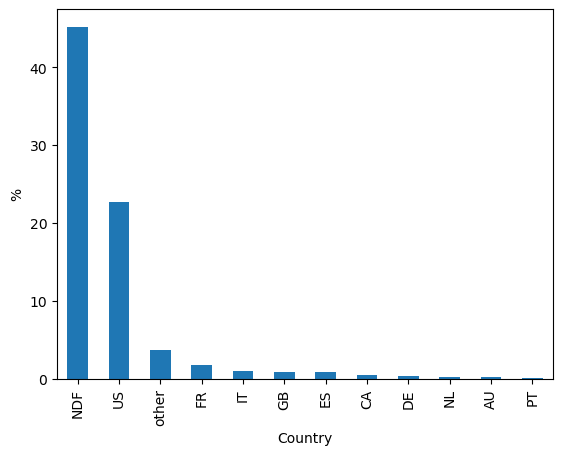

In [27]:
(USERS['country_destination'].value_counts() / USERS.shape[0] * 100).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('%')
plt.show()

We can see here that almost half of our training set did not book yet and that most of the bookings that did happen are within country of residence (Users in dataset are from US). In addition, this is merged dataset and it is expected that we have a lot of NDF data since there are a lot of new users in this set.

We will create second dataset USERS_THAT_BOOKED, where we will exclude users without booking and also users that booked within US
Since we want to make better classification of travel bookings

In [28]:
UDB = USERS[USERS['country_destination'] != 'NDF']
USERS_THAT_BOOKED = UDB[UDB['country_destination'] != 'US']

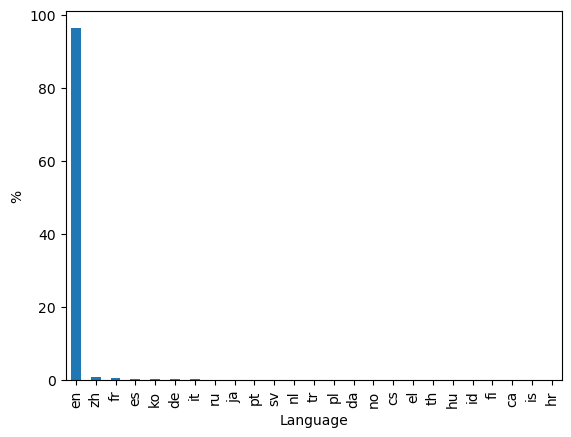

In [29]:
(USERS['language'].value_counts() / USERS.shape[0] * 100).plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('%')
plt.show()

Here we can see that most of the users are english speaking which makes sense given that dataset is for users from US

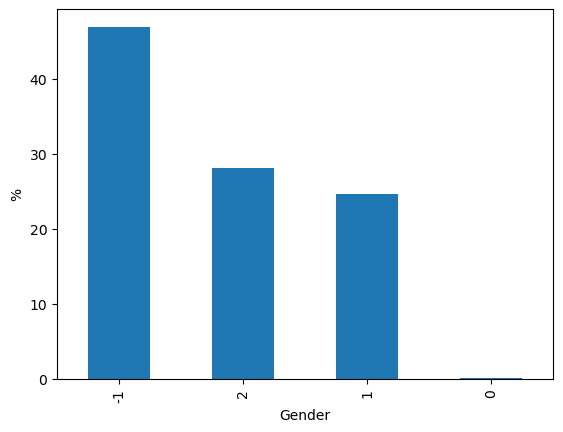

In [30]:
(USERS['gender'].value_counts() / USERS.shape[0] * 100).plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('%')
plt.show()

If we look at this distribution with values replaced before
- null and unknown values with -1
- OTHER with 0
- MALE with 1
- FEMALE with 2

We can see that almost half of the gender data is available
And also we see that there is just a small difference between male and female

### Ratio of users who book by the type of device they use

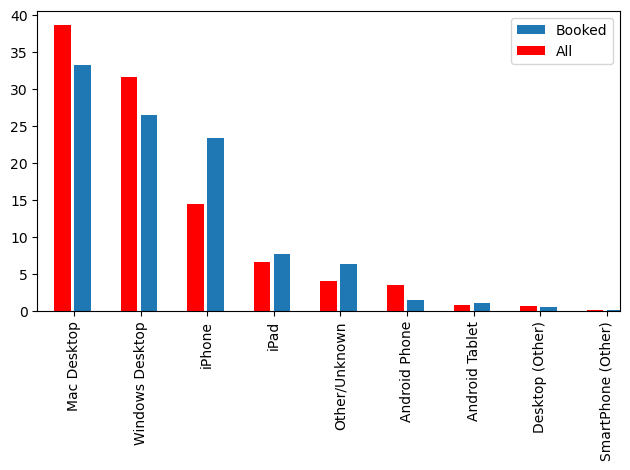

In [31]:
fig, ax = plt.subplots()
width = 0.35
x = np.arange(len(USERS['first_device_type'].unique()))

(USERS_THAT_BOOKED['first_device_type'].value_counts() / USERS_THAT_BOOKED.shape[0] * 100).plot(
    kind='bar',
    ax=ax,
    position=0,
    width=0.25,
    label='Booked'
)

(USERS['first_device_type'].value_counts() / USERS.shape[0] * 100).plot(
    kind='bar',
    ax=ax,
    color='red',
    position=1.2,
    width=0.25,
    label='All'
)

ax.legend()
fig.tight_layout()
plt.show()

Here we can see that majority of users are using Apple products with AirBnb
We can also see that people with Mac desktops are booking more frequently

### Chart showing total number of users by their age

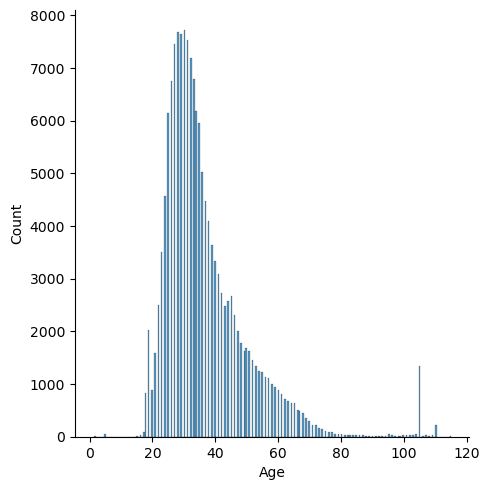

In [32]:
seaborn.displot(USERS['age'].dropna())
plt.xlabel('Age')
plt.show()

Here we can see that the number of users who are 18-25 rapidly grows. In addition, the number of users rapidly decreases when the chart reaches late 30s. There are no or very few people in the range of 70-120. The one line past 100 could possibly be an outlier with almost 2k people at that age in the dataset.

### Chart showing the frequency of bookings of certain age groups in each country

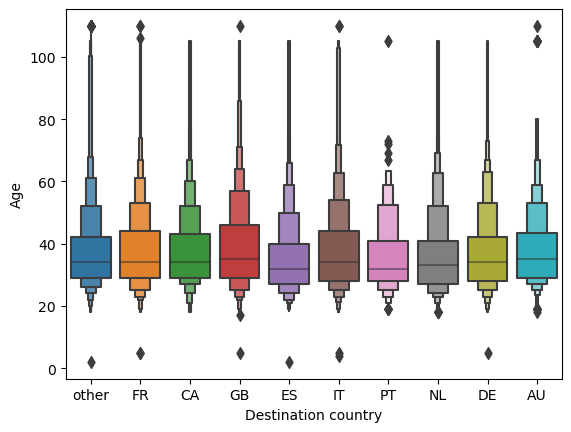

In [33]:
seaborn.boxenplot(y='age', x='country_destination', data=USERS_THAT_BOOKED)
plt.xlabel('Destination country')
plt.ylabel('Age')
plt.show()

Here we can see that Spain, Protugal and Netherlands are the destinations which are more popular between young generation. Great Britain and Germany more popular among older generation.

### Chart showing the frequency of bookings through months and years

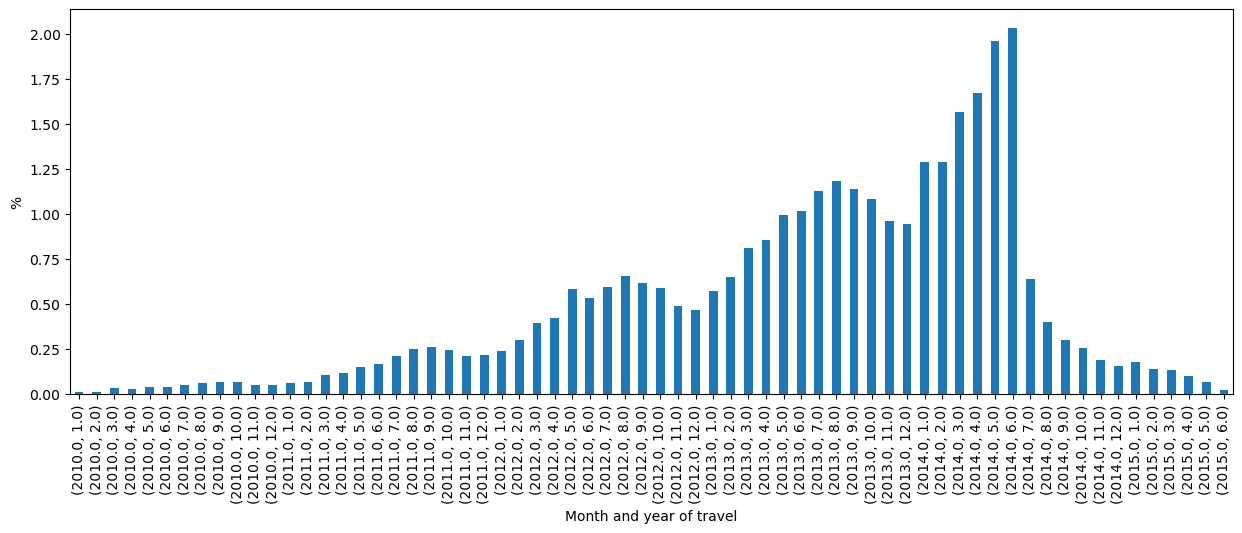

In [34]:
USERS['booked'] = USERS['country_destination'].apply(lambda x:1 if x!='NDF' else 0 )
fig, ax = plt.subplots(1,1, figsize=(15, 5))

(USERS.groupby(['booking_year', 'booking_month'])['booked'].sum() / USERS.shape[0] * 100).plot(kind='bar')

plt.xlabel('Month and year of travel')
plt.ylabel('%')
plt.show()


Here we can see that there are more bookings in certain months, no matter the year pattern of growth is same where most booked months are 5,6,7 which is expected overall. This is so-called high summer season which is well-known for most of the popular touristic spots to be packed with people. Since most people consider June, July and August the most popular months for travelling it is interesting to see May occuring in this pattern.


### Chart  that distributes users per their language by the ages and countries they book


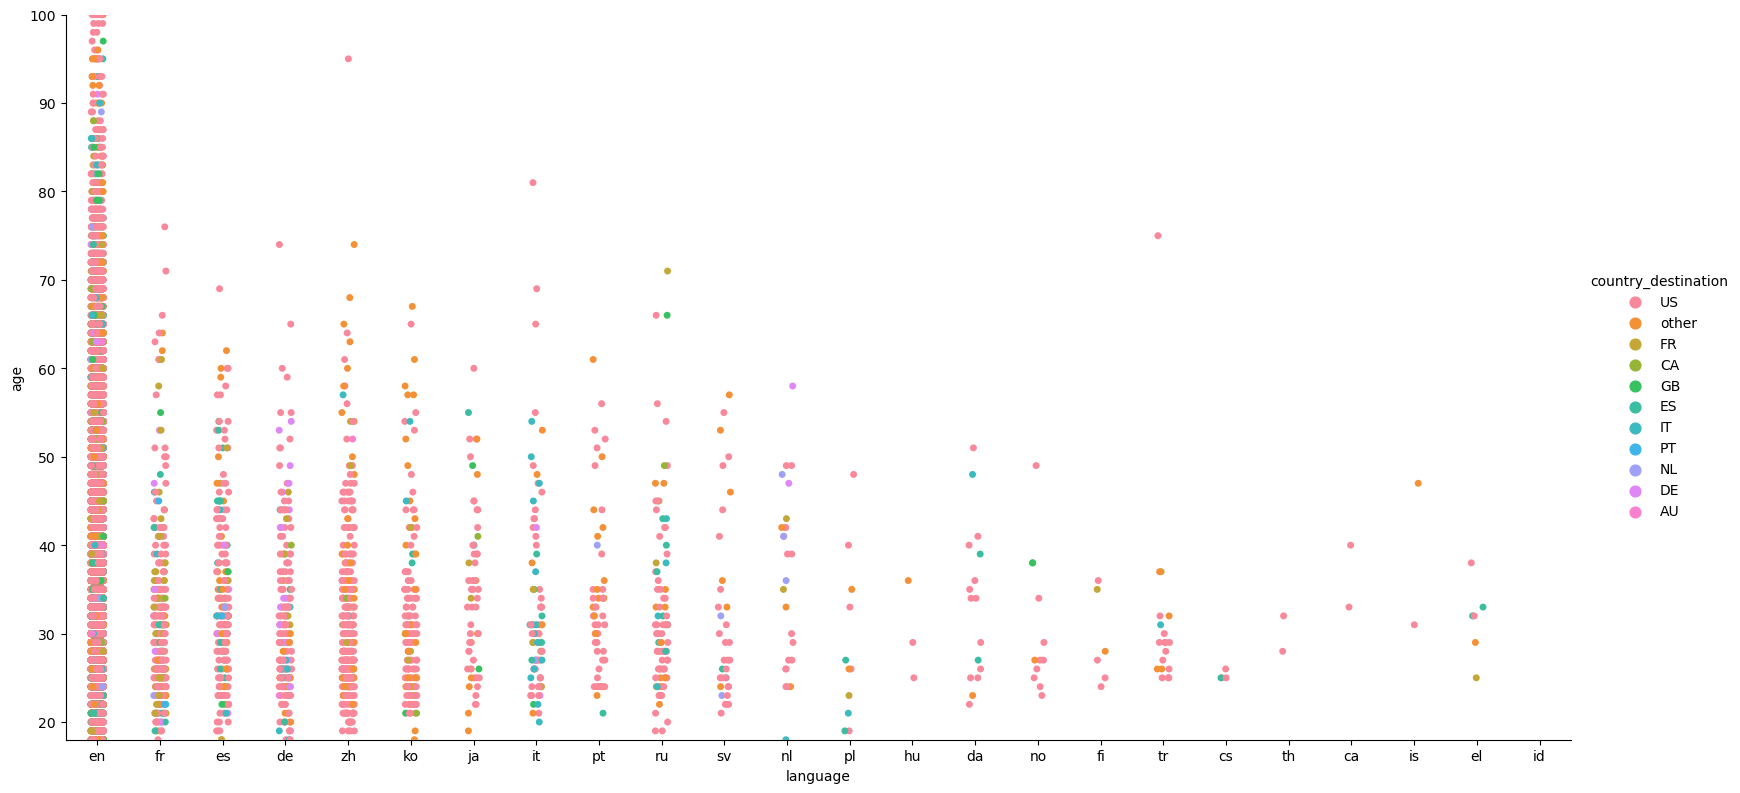

In [35]:
seaborn.catplot(x="language", y="age", data=USERS[USERS['country_destination']!='NDF'], hue='country_destination', height=8, aspect=2)

plt.ylim(18,100)

seaborn.despine()

Here we can see that mostly people who speak english are traveling to all countries, but mostly in the US

#### Previous chart but US is dropped

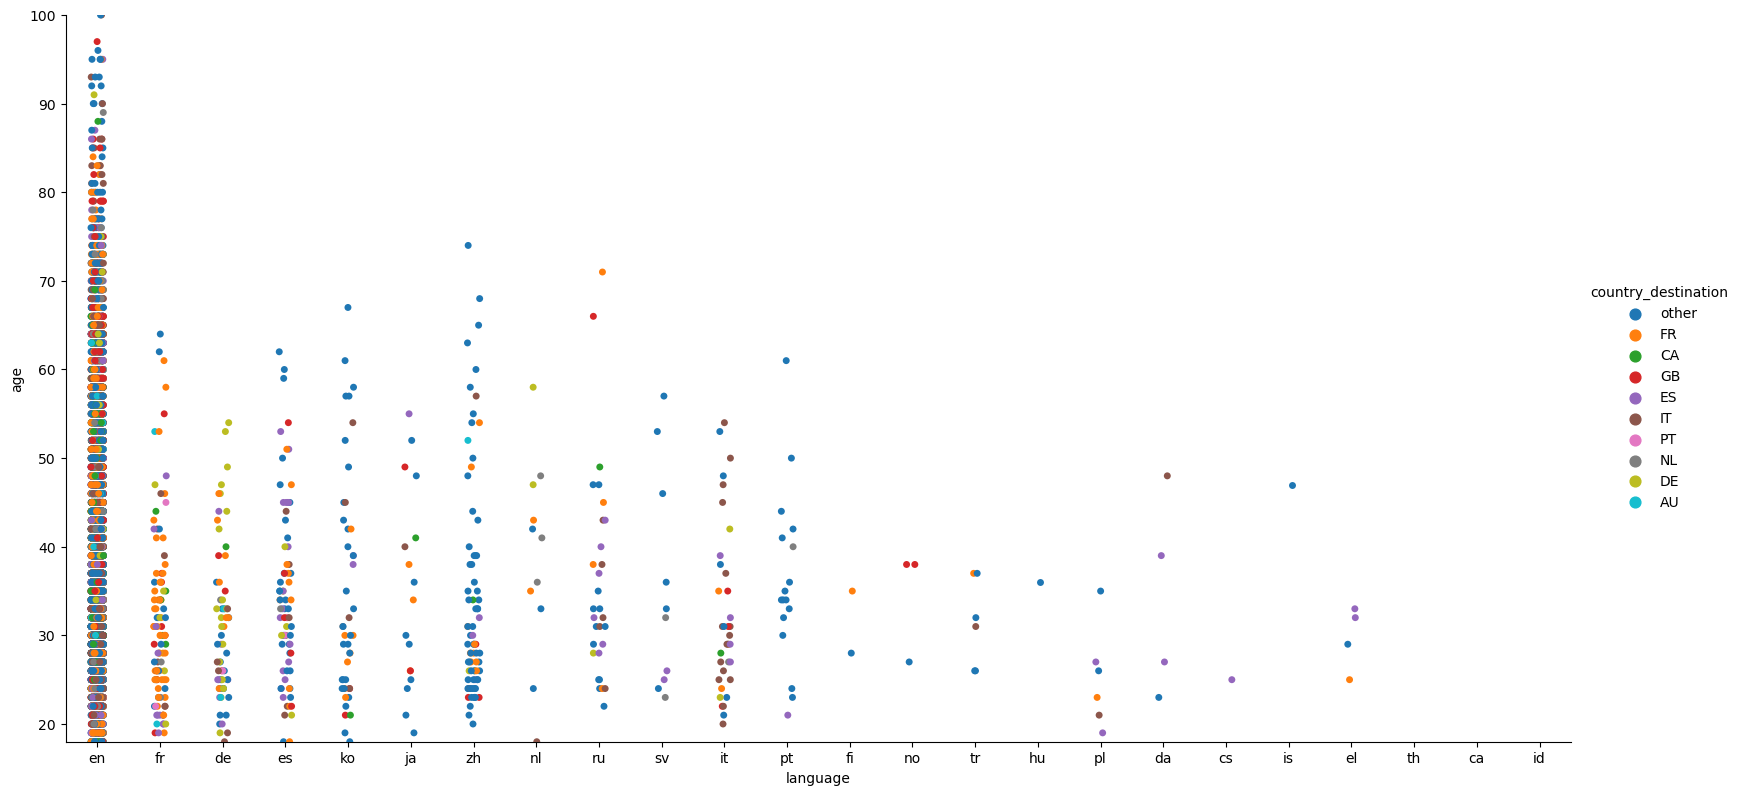

In [36]:
users_without_us = USERS[USERS['country_destination']!='NDF']
users_without_us = users_without_us[users_without_us['country_destination'] != 'US']
seaborn.catplot(x="language", y="age", data=users_without_us, hue='country_destination', height=8, aspect=2)

plt.ylim(18,100)

seaborn.despine()

After removing US as destination country to get more understanding we see much more variability in age for users speaking english language.

1) For people who are in the 40-50 age group and speak English France is significantly popular as a destination.

2) People speaking Chinese are mostly choosing some other destinations rather than the given ones in the dataset.

3) For the younger ones 20-30 who speak English or Italian Italy is a common choice.

4) Those who speak Spanish sometimes choose Spain as their destination, but not always. This is due to many people speak Spanish and their destination there vary.

5) German speakers prefer Germany or a country that is not in the dataset - most likely Switzerland or Austria which are german speaking countries (this is just a hypotesis and a motivation for further explorations)

6) French speaking travellers usually choose France.

Therefore, many users will choose the country of the language they speak.




### Destination by age and device type

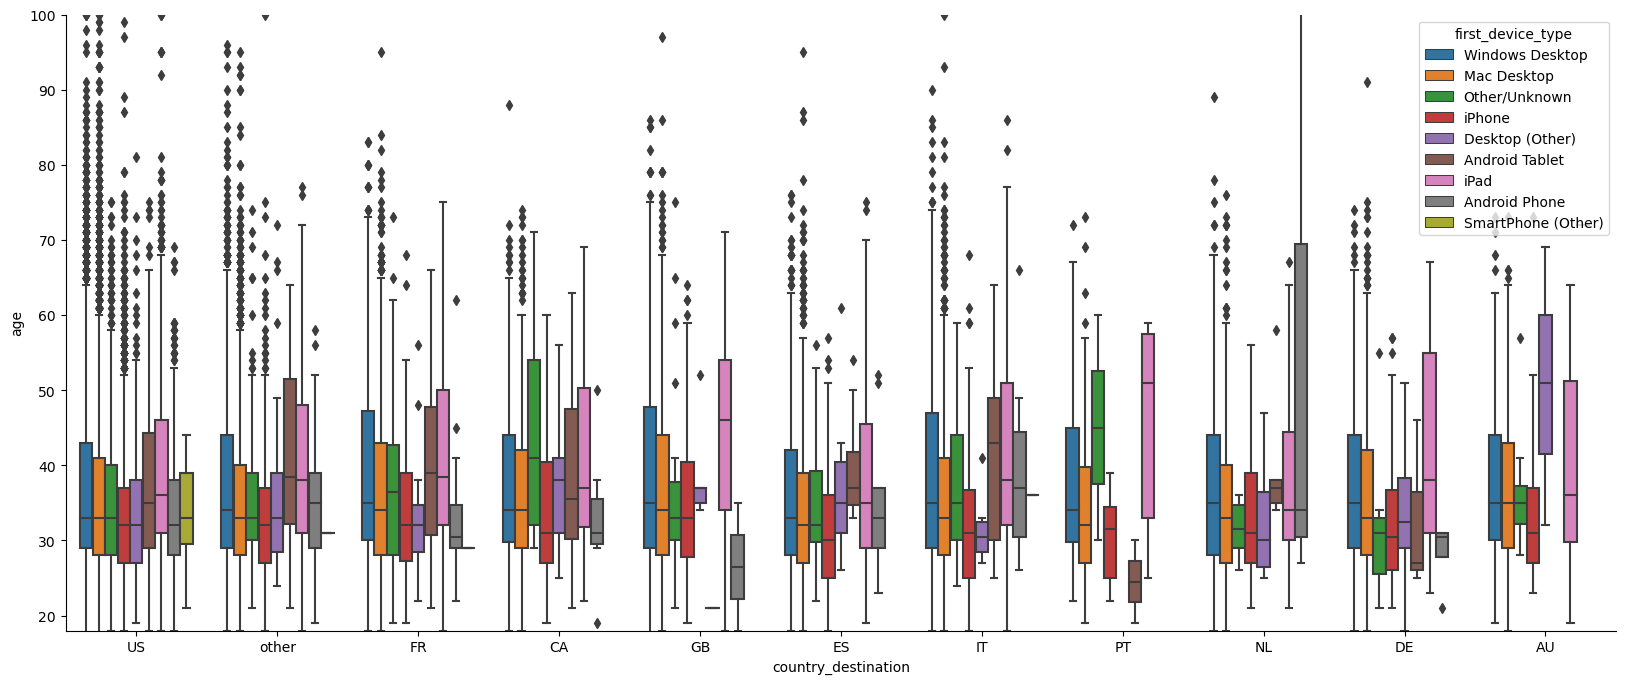

In [37]:
plt.figure(figsize=(20,8))
seaborn.boxplot(data=USERS[USERS['country_destination']!='NDF'], y='age', x='country_destination', hue='first_device_type')
plt.ylim(18,100)

seaborn.despine()

We can see the distribution of first device type in the first plot, with the majority of people using Mac desktops, followed by Windows desktops, and very few using Android device types.

We can see from the second plot that older users who are using iPads as their primary device are more likely to book trips to GB and PT.

- Younger users who use iPhones tend to schedule trips to nations like the United States, France, Canada, Spain, Italy, and Portugal.
- Younger users who use tablets using the Android operating system travel to Portugal.
- Younger users who use Android devices travel to Great Britain.
- A senior user who is utilizing an unknown or other equipment travels to Portugal.

## Building the model
### Preparing training set

In [38]:
TRAIN_SET.head()

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination,created_month,created_year,created_day,booking_month,booking_year,booking_day
0,gxn3p5htnn,-1,NaN,facebook,0,en,direct,direct,Web,Mac Desktop,Chrome,NDF,6,2010,28,NaN,NaN,NaN
1,820tgsjxq7,1,38.0,facebook,0,en,seo,google,Web,Mac Desktop,Chrome,NDF,5,2011,25,NaN,NaN,NaN
2,4ft3gnwmtx,2,56.0,basic,3,en,direct,direct,Web,Windows Desktop,IE,US,9,2010,28,8.0,2010.0,2.0
3,bjjt8pjhuk,2,42.0,facebook,0,en,direct,direct,Web,Mac Desktop,Firefox,other,12,2011,5,9.0,2012.0,8.0
4,87mebub9p4,-1,41.0,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,US,9,2010,14,2.0,2010.0,18.0


In [39]:
TRAIN_Y = TRAIN_SET['country_destination'].values
TRAIN_SET.drop(labels='country_destination', axis=1, inplace=True)

In [40]:
TRAIN_SET['booking_day'].isnull().values.any()

True

In [41]:
TRAIN_SET['booking_day'].fillna(0, inplace=True)
TRAIN_SET['booking_month'].fillna(0, inplace=True)
TRAIN_SET['booking_year'].fillna(0, inplace=True)
TRAIN_SET.head(50)

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,created_month,created_year,created_day,booking_month,booking_year,booking_day
0,gxn3p5htnn,-1,NaN,facebook,0,en,direct,direct,Web,Mac Desktop,Chrome,6,2010,28,0.0,0.0,0.0
1,820tgsjxq7,1,38.0,facebook,0,en,seo,google,Web,Mac Desktop,Chrome,5,2011,25,0.0,0.0,0.0
2,4ft3gnwmtx,2,56.0,basic,3,en,direct,direct,Web,Windows Desktop,IE,9,2010,28,8.0,2010.0,2.0
3,bjjt8pjhuk,2,42.0,facebook,0,en,direct,direct,Web,Mac Desktop,Firefox,12,2011,5,9.0,2012.0,8.0
4,87mebub9p4,-1,41.0,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,9,2010,14,2.0,2010.0,18.0
5,osr2jwljor,-1,NaN,basic,0,en,other,other,Web,Mac Desktop,Chrome,1,2010,1,1.0,2010.0,2.0
6,lsw9q7uk0j,2,46.0,basic,0,en,other,craigslist,Web,Mac Desktop,Safari,1,2010,2,1.0,2010.0,5.0
7,0d01nltbrs,2,47.0,basic,0,en,direct,direct,Web,Mac Desktop,Safari,1,2010,3,1.0,2010.0,13.0
8,a1vcnhxeij,2,50.0,basic,0,en,other,craigslist,Web,Mac Desktop,Safari,1,2010,4,7.0,2010.0,29.0
9,6uh8zyj2gn,-1,46.0,basic,0,en,other,craigslist,Web,Mac Desktop,Firefox,1,2010,4,1.0,2010.0,4.0


Here all the NULL values in age are replaced with the median value.

In [42]:
TRAIN_SET.loc[TRAIN_SET['age'].isnull(), 'age'] = TRAIN_SET['age'].median()

In [43]:
TRAIN_SET.to_csv('out/final_train_data.csv', index=False)
print(TRAIN_SET.shape)
TRAIN_SET.head(50)

(213451, 17)


,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,created_month,created_year,created_day,booking_month,booking_year,booking_day
0,gxn3p5htnn,-1,34.0,facebook,0,en,direct,direct,Web,Mac Desktop,Chrome,6,2010,28,0.0,0.0,0.0
1,820tgsjxq7,1,38.0,facebook,0,en,seo,google,Web,Mac Desktop,Chrome,5,2011,25,0.0,0.0,0.0
2,4ft3gnwmtx,2,56.0,basic,3,en,direct,direct,Web,Windows Desktop,IE,9,2010,28,8.0,2010.0,2.0
3,bjjt8pjhuk,2,42.0,facebook,0,en,direct,direct,Web,Mac Desktop,Firefox,12,2011,5,9.0,2012.0,8.0
4,87mebub9p4,-1,41.0,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,9,2010,14,2.0,2010.0,18.0
5,osr2jwljor,-1,34.0,basic,0,en,other,other,Web,Mac Desktop,Chrome,1,2010,1,1.0,2010.0,2.0
6,lsw9q7uk0j,2,46.0,basic,0,en,other,craigslist,Web,Mac Desktop,Safari,1,2010,2,1.0,2010.0,5.0
7,0d01nltbrs,2,47.0,basic,0,en,direct,direct,Web,Mac Desktop,Safari,1,2010,3,1.0,2010.0,13.0
8,a1vcnhxeij,2,50.0,basic,0,en,other,craigslist,Web,Mac Desktop,Safari,1,2010,4,7.0,2010.0,29.0
9,6uh8zyj2gn,-1,46.0,basic,0,en,other,craigslist,Web,Mac Desktop,Firefox,1,2010,4,1.0,2010.0,4.0


### Preparing test set

In [45]:
TEST_SET['booking_day'].fillna(0, inplace=True)
TEST_SET['booking_month'].fillna(0, inplace=True)
TEST_SET['booking_year'].fillna(0, inplace=True)
TEST_SET.head(50)

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,created_month,created_year,created_day,booking_month,booking_year,booking_day
0,5uwns89zht,2,35.0,facebook,0,en,direct,direct,Moweb,iPhone,Mobile Safari,7,2014,1,0.0,0.0,0.0
1,jtl0dijy2j,-1,NaN,basic,0,en,direct,direct,Moweb,iPhone,Mobile Safari,7,2014,1,0.0,0.0,0.0
2,xx0ulgorjt,-1,NaN,basic,0,en,direct,direct,Web,Windows Desktop,Chrome,7,2014,1,0.0,0.0,0.0
3,6c6puo6ix0,-1,NaN,basic,0,en,direct,direct,Web,Windows Desktop,IE,7,2014,1,0.0,0.0,0.0
4,czqhjk3yfe,-1,NaN,basic,0,en,direct,direct,Web,Mac Desktop,Safari,7,2014,1,0.0,0.0,0.0
5,szx28ujmhf,2,28.0,basic,0,en,sem-brand,google,Web,Windows Desktop,Chrome,7,2014,1,0.0,0.0,0.0
6,guenkfjcbq,1,48.0,basic,25,en,direct,direct,iOS,iPhone,-unknown-,7,2014,1,0.0,0.0,0.0
7,tkpq0mlugk,-1,NaN,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,7,2014,1,0.0,0.0,0.0
8,3xtgd5p9dn,-1,NaN,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,7,2014,1,0.0,0.0,0.0
9,md9aj22l5a,-1,NaN,basic,0,en,sem-non-brand,google,Web,Windows Desktop,Firefox,7,2014,1,0.0,0.0,0.0


In [44]:
TEST_SET.head(50)

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,created_month,created_year,created_day,booking_month,booking_year,booking_day
0,5uwns89zht,2,35.0,facebook,0,en,direct,direct,Moweb,iPhone,Mobile Safari,7,2014,1,NaN,NaN,NaN
1,jtl0dijy2j,-1,NaN,basic,0,en,direct,direct,Moweb,iPhone,Mobile Safari,7,2014,1,NaN,NaN,NaN
2,xx0ulgorjt,-1,NaN,basic,0,en,direct,direct,Web,Windows Desktop,Chrome,7,2014,1,NaN,NaN,NaN
3,6c6puo6ix0,-1,NaN,basic,0,en,direct,direct,Web,Windows Desktop,IE,7,2014,1,NaN,NaN,NaN
4,czqhjk3yfe,-1,NaN,basic,0,en,direct,direct,Web,Mac Desktop,Safari,7,2014,1,NaN,NaN,NaN
5,szx28ujmhf,2,28.0,basic,0,en,sem-brand,google,Web,Windows Desktop,Chrome,7,2014,1,NaN,NaN,NaN
6,guenkfjcbq,1,48.0,basic,25,en,direct,direct,iOS,iPhone,-unknown-,7,2014,1,NaN,NaN,NaN
7,tkpq0mlugk,-1,NaN,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,7,2014,1,NaN,NaN,NaN
8,3xtgd5p9dn,-1,NaN,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,7,2014,1,NaN,NaN,NaN
9,md9aj22l5a,-1,NaN,basic,0,en,sem-non-brand,google,Web,Windows Desktop,Firefox,7,2014,1,NaN,NaN,NaN


Here we ensure that in test set there are no previous bookings.

In [46]:
TEST_SET.loc[TEST_SET['age'].isnull(), 'age'] = TEST_SET['age'].median()
TEST_SET.head(50)

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,created_month,created_year,created_day,booking_month,booking_year,booking_day
0,5uwns89zht,2,35.0,facebook,0,en,direct,direct,Moweb,iPhone,Mobile Safari,7,2014,1,0.0,0.0,0.0
1,jtl0dijy2j,-1,31.0,basic,0,en,direct,direct,Moweb,iPhone,Mobile Safari,7,2014,1,0.0,0.0,0.0
2,xx0ulgorjt,-1,31.0,basic,0,en,direct,direct,Web,Windows Desktop,Chrome,7,2014,1,0.0,0.0,0.0
3,6c6puo6ix0,-1,31.0,basic,0,en,direct,direct,Web,Windows Desktop,IE,7,2014,1,0.0,0.0,0.0
4,czqhjk3yfe,-1,31.0,basic,0,en,direct,direct,Web,Mac Desktop,Safari,7,2014,1,0.0,0.0,0.0
5,szx28ujmhf,2,28.0,basic,0,en,sem-brand,google,Web,Windows Desktop,Chrome,7,2014,1,0.0,0.0,0.0
6,guenkfjcbq,1,48.0,basic,25,en,direct,direct,iOS,iPhone,-unknown-,7,2014,1,0.0,0.0,0.0
7,tkpq0mlugk,-1,31.0,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,7,2014,1,0.0,0.0,0.0
8,3xtgd5p9dn,-1,31.0,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,7,2014,1,0.0,0.0,0.0
9,md9aj22l5a,-1,31.0,basic,0,en,sem-non-brand,google,Web,Windows Desktop,Firefox,7,2014,1,0.0,0.0,0.0


In [47]:
TRAIN_SET.to_csv('out/final_test_data.csv', index=False)
print(TRAIN_SET.shape)
TRAIN_SET.head(50)

(213451, 17)


,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,created_month,created_year,created_day,booking_month,booking_year,booking_day
0,gxn3p5htnn,-1,34.0,facebook,0,en,direct,direct,Web,Mac Desktop,Chrome,6,2010,28,0.0,0.0,0.0
1,820tgsjxq7,1,38.0,facebook,0,en,seo,google,Web,Mac Desktop,Chrome,5,2011,25,0.0,0.0,0.0
2,4ft3gnwmtx,2,56.0,basic,3,en,direct,direct,Web,Windows Desktop,IE,9,2010,28,8.0,2010.0,2.0
3,bjjt8pjhuk,2,42.0,facebook,0,en,direct,direct,Web,Mac Desktop,Firefox,12,2011,5,9.0,2012.0,8.0
4,87mebub9p4,-1,41.0,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,9,2010,14,2.0,2010.0,18.0
5,osr2jwljor,-1,34.0,basic,0,en,other,other,Web,Mac Desktop,Chrome,1,2010,1,1.0,2010.0,2.0
6,lsw9q7uk0j,2,46.0,basic,0,en,other,craigslist,Web,Mac Desktop,Safari,1,2010,2,1.0,2010.0,5.0
7,0d01nltbrs,2,47.0,basic,0,en,direct,direct,Web,Mac Desktop,Safari,1,2010,3,1.0,2010.0,13.0
8,a1vcnhxeij,2,50.0,basic,0,en,other,craigslist,Web,Mac Desktop,Safari,1,2010,4,7.0,2010.0,29.0
9,6uh8zyj2gn,-1,46.0,basic,0,en,other,craigslist,Web,Mac Desktop,Firefox,1,2010,4,1.0,2010.0,4.0


In this part vectorization of all the text is conducted. In order to get the value out of text entries, these values had to be transformed into vector.

Vectorization is done using vec.transform() frunction. Values of the following entries were vectorized in this step: Signup_method, language, affiliate_channel, affiliate_provider, signup_app, first_device_type, first_browser.

In [61]:
def text_preprocess(tr_val, test_val):
    vec = CountVectorizer()
    vec.fit(tr_val)
    # We use same vectorizer for both train and test data
    return vec.transform(tr_val), vec.transform(test_val)

tr_signup_method, test_signup_method = text_preprocess(TRAIN_SET['signup_method'].values,
                                                       TEST_SET['signup_method'].values)

tr_language, test_language = text_preprocess(TRAIN_SET['language'].values,
                                             TEST_SET['language'].values)

tr_affiliate_channel, test_affiliate_channel = text_preprocess(TRAIN_SET['affiliate_channel'].values,
                                                               TEST_SET['affiliate_channel'].values)

tr_affiliate_provider, test_affiliate_provider = text_preprocess(TRAIN_SET['affiliate_provider'].values,
                                                                 TEST_SET['affiliate_provider'].values)

tr_signup_app, test_signup_app = text_preprocess(TRAIN_SET['signup_app'].values,
                                                 TEST_SET['signup_app'].values)

tr_first_device_type, test_first_device_type = text_preprocess(TRAIN_SET['first_device_type'].values,
                                                               TEST_SET['first_device_type'].values)

tr_first_browser, test_first_browser = text_preprocess(TRAIN_SET['first_browser'].values,
                                                       TEST_SET['first_browser'].values)

In the following step we are prerocessing numbers using reshape funcion. This numpy function is usually used for  flattening a nested array of an unknown number of elements to a 1D array.

In [49]:
def num_preprocess(val):
    return val.values.reshape(-1, 1)

tr_gender = num_preprocess(TRAIN_SET['gender'])
test_gender = num_preprocess(TEST_SET['gender'])

tr_age = num_preprocess(TRAIN_SET['age'])
test_age = num_preprocess(TEST_SET['age'])

tr_signup_flow = num_preprocess(TRAIN_SET['signup_flow'])
test_signup_flow = num_preprocess(TEST_SET['signup_flow'])

tr_created_day = num_preprocess(TRAIN_SET['created_day'])
test_created_day = num_preprocess(TEST_SET['created_day'])

tr_created_month = num_preprocess(TRAIN_SET['created_month'])
test_created_month = num_preprocess(TEST_SET['created_month'])

tr_created_year = num_preprocess(TRAIN_SET['created_year'])
test_created_year = num_preprocess(TEST_SET['created_year'])

tr_booking_day = num_preprocess(TRAIN_SET['booking_day'])
test_booking_day = num_preprocess(TEST_SET['booking_day'])

tr_booking_month = num_preprocess(TRAIN_SET['booking_month'])
test_booking_month = num_preprocess(TEST_SET['booking_month'])

tr_booking_year = num_preprocess(TRAIN_SET['booking_year'])
test_booking_year = num_preprocess(TEST_SET['booking_year'])

This part is encoding labels into numbers for more efficiency.

In [50]:
label_encoder = preprocessing.LabelEncoder()
TRAIN_Y = label_encoder.fit_transform(TRAIN_Y).reshape(-1,1)

Next part is dealing with hstack. Explanation: Stack arrays in sequence horizontally (column wise). This is equivalent to concatenation along the second axis, except for 1-D arrays where it concatenates along the first axis.

In [51]:
TRAIN_X = hstack((
    tr_gender,
    tr_age,
    tr_signup_method,
    tr_signup_flow,
    tr_language,
    tr_affiliate_channel,
    tr_affiliate_provider,
    tr_signup_app,
    tr_first_device_type,
    tr_first_browser,
    tr_created_day,
    tr_created_month,
    tr_created_year,
    tr_booking_day,
    tr_booking_month,
    tr_booking_year
)).tocsr()

print("Final Training data")
print(TRAIN_X.shape, TRAIN_Y.shape)

Final Training data
(213451, 139) (213451, 1)


In [52]:
TEST_X = hstack((
    test_gender,
    test_age,
    test_signup_method,
    test_signup_flow,
    test_language,
    test_affiliate_channel,
    test_affiliate_provider,
    test_signup_app,
    test_first_device_type,
    test_first_browser,
    test_created_day,
    test_created_month,
    test_created_year,
    test_booking_day,
    test_booking_month,
    test_booking_year
)).tocsr()

print("Final Test data")
print(TEST_X.shape)

Final Test data
(62096, 139)


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

TR_X_SPLIT, TEST_X_SPLIT, TR_Y_SPLIT, TEST_Y_SPLIT = train_test_split(TRAIN_X, TRAIN_Y, test_size=0.15, random_state=42)

scaler = StandardScaler(with_mean=False)
scaler.fit(TR_X_SPLIT)

TR_X_SPLIT = scaler.transform(TR_X_SPLIT)
TEST_X_SPLIT = scaler.transform(TEST_X_SPLIT)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

LABELS = ['AU', 'other', 'NDF', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL', 'DE', 'US', 'FR']

## KNN (K-Nearest Neighbors)

/Users/lejlaomerovic/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[ACCURACY]: 0.9970732997855958
 -------- 

[F1 SCORE]:  0.9970728932521039


/Users/lejlaomerovic/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


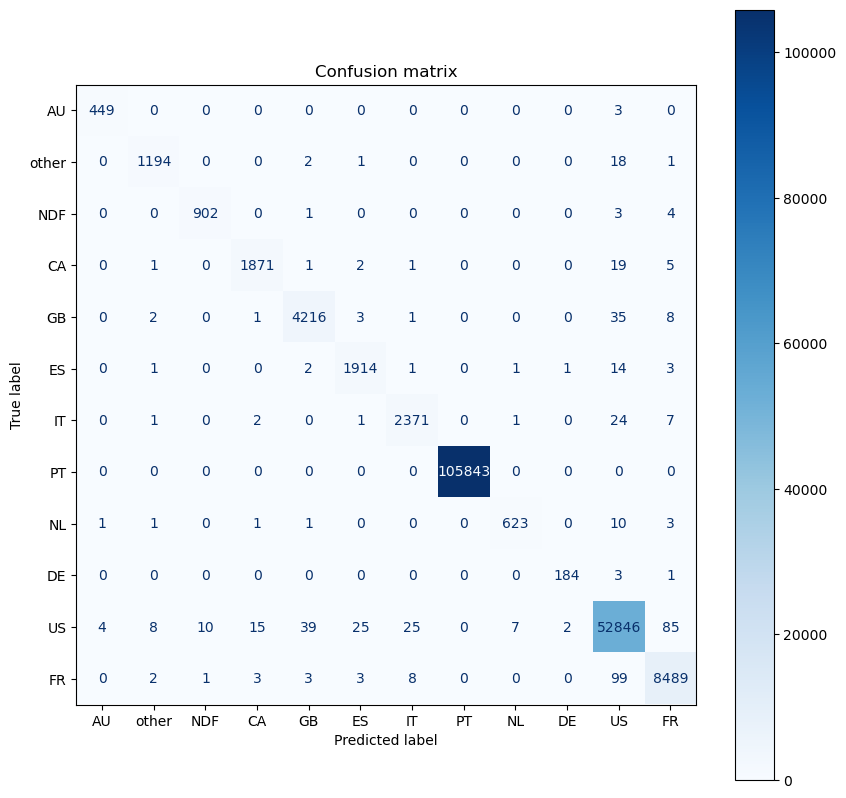

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(TR_X_SPLIT, np.squeeze(TR_Y_SPLIT))

knn_training = model.predict(TR_X_SPLIT)
score = accuracy_score(TR_Y_SPLIT, knn_training)
print("[ACCURACY]: {0}\n -------- \n".format(score))
print("[F1 SCORE]: " , f1_score(TR_Y_SPLIT, knn_training, average='weighted'))

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    TR_X_SPLIT,
    TR_Y_SPLIT,
    display_labels=LABELS,
    cmap=plt.cm.Blues,
    ax=ax
)

disp.ax_.set_title("Confusion matrix")
plt.show()

### Naive Bayes

[ACCURACY]: 0.585477834793009
[F1 SCORE] : 0.5845183229167444
 -------- 



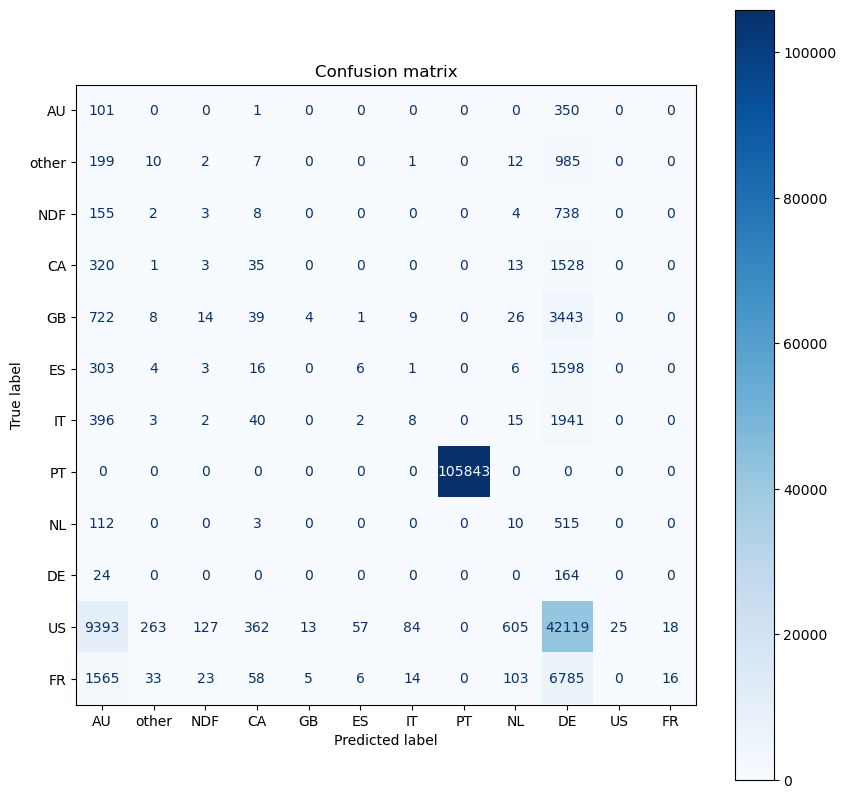

In [56]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
model = nb.fit(TR_X_SPLIT.toarray(),np.squeeze(TR_Y_SPLIT))

nb_training = model.predict(TR_X_SPLIT.toarray())
score = accuracy_score(TR_Y_SPLIT, nb_training)
print("[ACCURACY]: {0}".format(score))
print("[F1 SCORE] : {0}\n -------- \n".format(f1_score(TR_Y_SPLIT, nb_training, average='weighted')))


fig, ax = plt.subplots(figsize=(10, 10))

disp = ConfusionMatrixDisplay.from_estimator(
    model,
    TR_X_SPLIT.toarray(),
    TR_Y_SPLIT,
    display_labels=LABELS,
    cmap=plt.cm.Blues,
    ax=ax
)

disp.ax_.set_title("Confusion matrix")
plt.show()

### Decision Tree

[DEPTH]: 5 
[SAMPLE SPLIT]: 50 
[ACCURACY]: 0.8758880688739094 
[F1 SCORE]: 0.8247827089375257
 -------- 



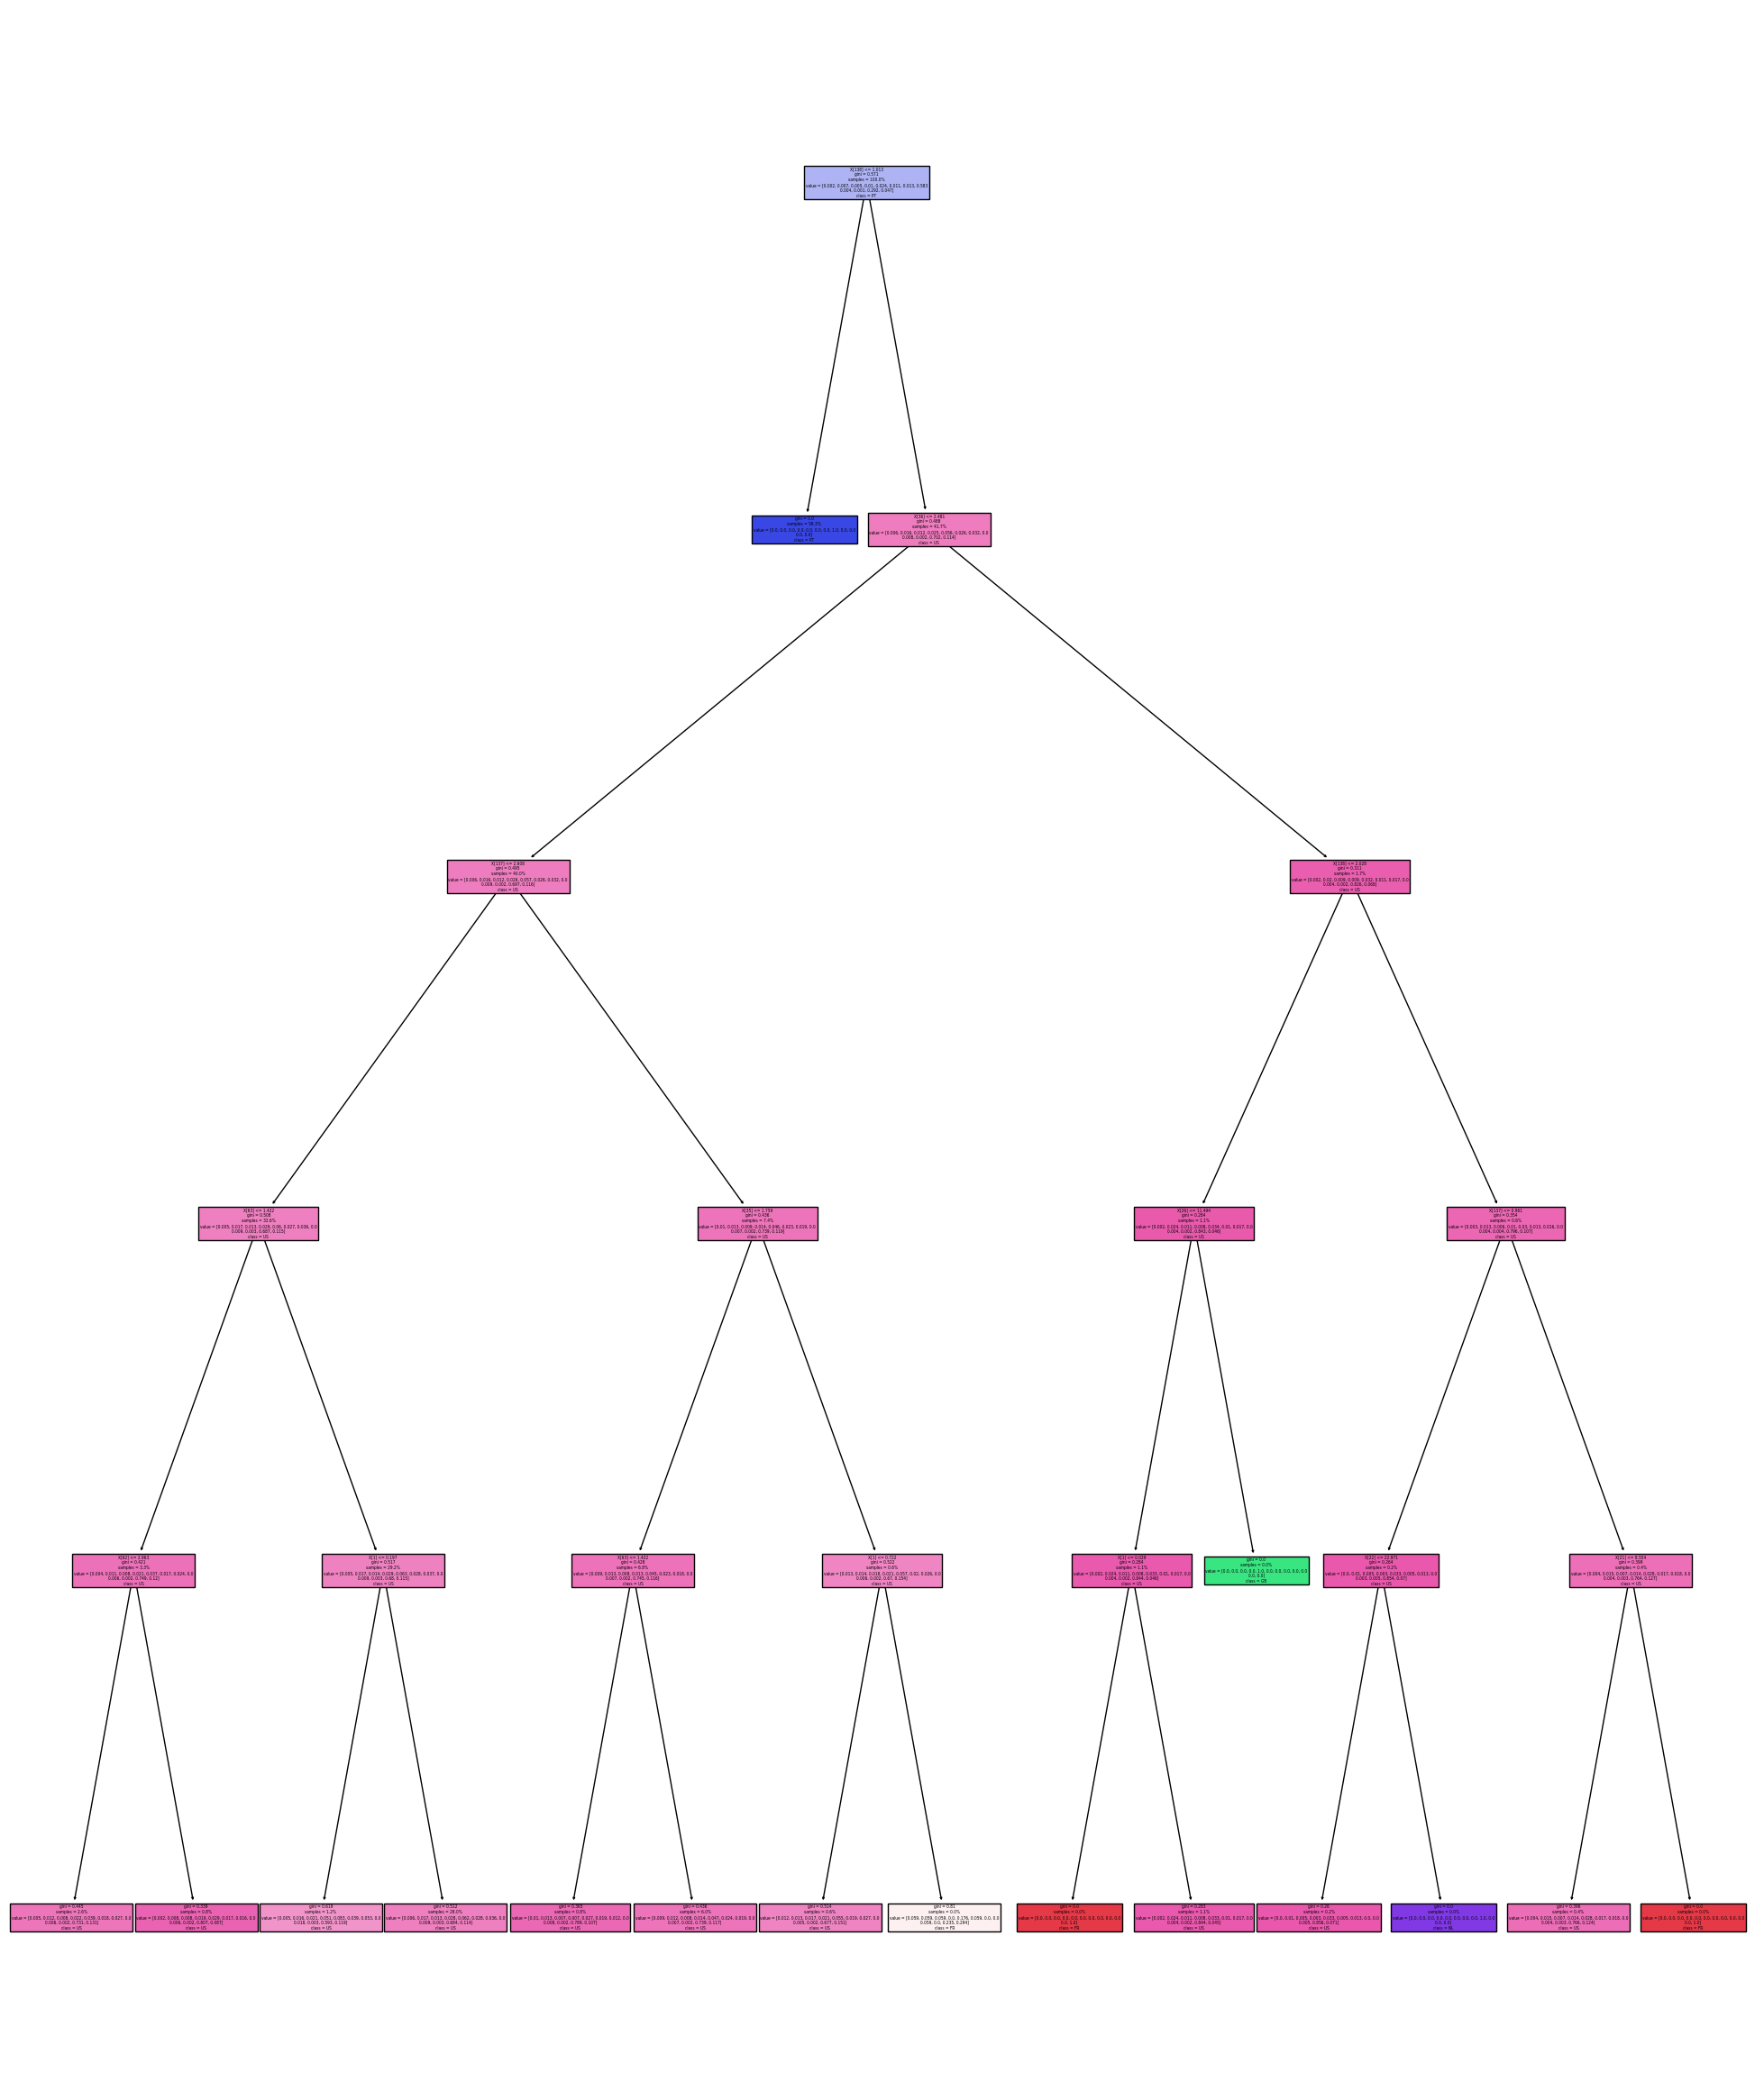

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

d_tree = DecisionTreeClassifier(criterion='gini', max_depth=5 , min_samples_split= 50)
classifier = d_tree.fit(TR_X_SPLIT,TR_Y_SPLIT)

d_tree_training = classifier.predict(TR_X_SPLIT)
score = accuracy_score(TR_Y_SPLIT, d_tree_training)
print("[DEPTH]: {0} \n[SAMPLE SPLIT]: {1} \n[ACCURACY]: {2} \n[F1 SCORE]: {3}\n -------- \n".format(5, 50, score, f1_score(TR_Y_SPLIT, d_tree_training, average='weighted')))


fig = plt.figure(figsize=(25,30))
tree.plot_tree(classifier, class_names=LABELS, filled=True, proportion=True, impurity=True, rounded=False)
fig.savefig("out/decision.png")

### LogisticRegression

[DEPTH]: 1 
[ACCURACY]: 0.8758549988149895
 -------- 

[F1 SCORE] :  0.8246496245387508


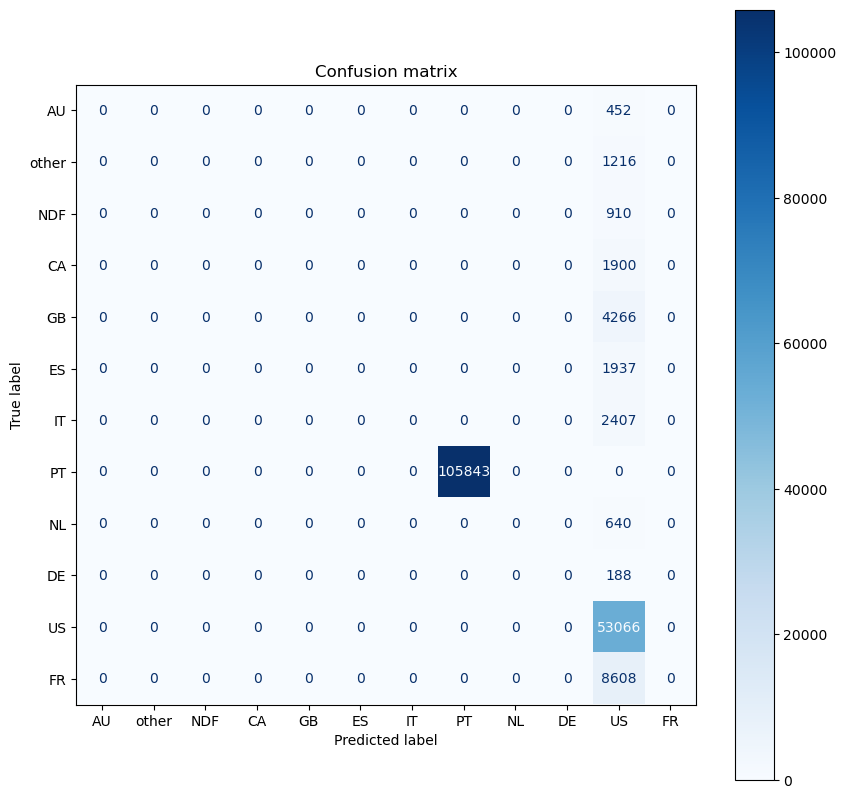

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  ConfusionMatrixDisplay, confusion_matrix

lr = LogisticRegression(solver='liblinear', max_iter=100)

X_LR, X_TEST_LR, Y_LR, Y_TEST_LR = train_test_split(TRAIN_X, TRAIN_Y, test_size=0.15, random_state=42)
lr.fit(X_LR, np.ravel(Y_LR))

lr_training = lr.predict(X_LR)
score = accuracy_score(Y_LR, lr_training)

print("[DEPTH]: {0} \n[ACCURACY]: {1}\n -------- \n".format(1, score))
print("[F1 SCORE] : " , f1_score(Y_LR, lr_training, average='weighted'))


fig, ax = plt.subplots(figsize=(10, 10))

disp = ConfusionMatrixDisplay.from_estimator(
    lr,
    X_LR,
    Y_LR,
    display_labels=LABELS,
    cmap=plt.cm.Blues,
    ax=ax
)

disp.ax_.set_title("Confusion matrix")
plt.show()